In [32]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

df = pd.read_csv('Salary Data.csv')

In [35]:
education_mapping = {"Bachelor's": 1, "Master's": 2, "PhD": 3}

In [36]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [34]:
df.shape

(375, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [7]:
df[df[columns_with_null].isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


**We are dropping these 2 rows as it is containg on NaN Values**

In [8]:
df = df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [10]:
df['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

**Iam dropping this column as i want simple application and want learn deployment**

In [11]:
df.drop('Job Title',axis=1, inplace=True)

In [12]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0


In [13]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [14]:
df

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,Bachelor's,5.0,90000.0
1,28.0,0,Master's,3.0,65000.0
2,45.0,1,PhD,15.0,150000.0
3,36.0,0,Bachelor's,7.0,60000.0
4,52.0,1,Master's,20.0,200000.0
...,...,...,...,...,...
370,35.0,0,Bachelor's,8.0,85000.0
371,43.0,1,Master's,19.0,170000.0
372,29.0,0,Bachelor's,2.0,40000.0
373,34.0,1,Bachelor's,7.0,90000.0


In [15]:
#Converting words to integer values
def convert_to_int(word):
    word_dict = {"Bachelor's":1, "Master's":2, "PhD":3}
    return word_dict[word]

df['Education Level'] = df['Education Level'].apply(lambda x : convert_to_int(x))

In [16]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,1,5.0,90000.0
1,28.0,0,2,3.0,65000.0
2,45.0,1,3,15.0,150000.0
3,36.0,0,1,7.0,60000.0
4,52.0,1,2,20.0,200000.0


In [17]:
X = df.drop(columns = 'Salary')

In [18]:
y = df["Salary"]

### Splitting Training and Test Set

**Since we have a very small dataset, we will train our model with all availabe data.**

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [20]:
#Fitting model with trainig data
regressor.fit(X, y)

LinearRegression()

In [22]:
y_pred = regressor.predict(X)

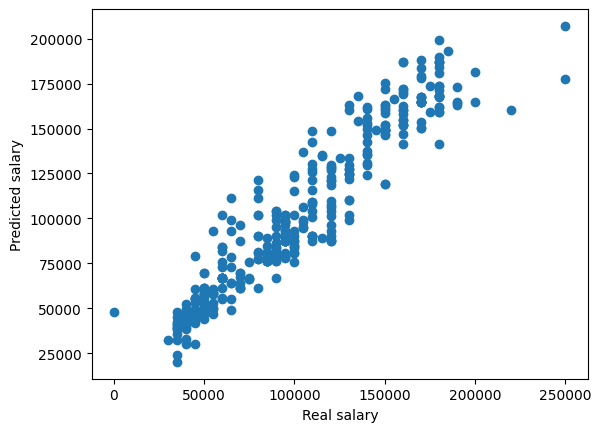

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.xlabel("Real salary")
plt.ylabel("Predicted salary")
plt.show()

In [24]:
# accuracy of training dataset
from sklearn.metrics import r2_score
print(r2_score(y, y_pred))

0.9003821547631594


In [26]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [31]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[28.0	,1	,2,	5.5]]))

[71033.58743285]


/Users/hitam/Downloads/End2End_Salary_Prediction/salary/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
